# Part I - (Ford GoBike System Data Analysis)

## Introduction
This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.
 
The Data
Each trip is anonymized and includes:

*  Trip Duration (seconds)
*  Start Time and Date
*  End Time and Date
*  Start Station ID
*  Start Station Name
*  Start Station Latitude
*  Start Station Longitude
*  End Station ID
*  End Station Name
*  End Station Latitude
*  End Station Longitude
*  Bike ID
*  User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)



## Preliminary Wrangling


In [1]:
#import statements
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

%matplotlib inline

In [2]:
# Loading the dataset
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
# Sample of the data
df.sample(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
93679,653,2019-02-15 17:21:57.7860,2019-02-15 17:32:50.9030,246.0,Berkeley Civic Center,37.869060,-122.270556,175.0,49th St at Telegraph Ave,37.835946,-122.262366,5090,Subscriber,1985.0,Male,No
150048,168,2019-02-06 18:36:53.1910,2019-02-06 18:39:42.1590,145.0,29th St at Church St,37.743684,-122.426806,138.0,Jersey St at Church St,37.750900,-122.427411,5163,Subscriber,1995.0,Female,No
147367,205,2019-02-07 07:59:43.9330,2019-02-07 08:03:09.4750,91.0,Berry St at King St,37.771762,-122.398438,102.0,Irwin St at 8th St,37.766883,-122.399579,5337,Subscriber,1995.0,Female,No
50765,635,2019-02-21 18:41:12.1750,2019-02-21 18:51:47.2160,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,97.0,14th St at Mission St,37.768265,-122.420110,4963,Subscriber,1991.0,Male,No
146711,602,2019-02-07 08:29:45.2860,2019-02-07 08:39:47.3270,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,5495,Subscriber,1981.0,Male,No
176674,313,2019-02-02 10:50:08.0050,2019-02-02 10:55:21.9740,196.0,Grand Ave at Perkins St,37.808894,-122.256460,200.0,2nd Ave at E 18th St,37.800214,-122.253810,4869,Subscriber,1987.0,Male,No
120829,271,2019-02-11 16:38:50.6250,2019-02-11 16:43:21.7380,121.0,Mission Playground,37.759210,-122.421339,119.0,18th St at Noe St,37.761047,-122.432642,5132,Subscriber,1964.0,Male,No
84640,1257,2019-02-17 16:52:26.1320,2019-02-17 17:13:23.8420,132.0,24th St at Chattanooga St,37.751819,-122.426614,98.0,Valencia St at 16th St,37.765052,-122.421866,4412,Subscriber,1987.0,Female,No
13479,70,2019-02-27 16:06:31.5840,2019-02-27 16:07:41.8630,276.0,Julian St at The Alameda,37.332233,-121.912516,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3928,Subscriber,1996.0,Male,Yes
114914,252,2019-02-12 09:08:57.0520,2019-02-12 09:13:09.6590,168.0,Alcatraz Ave at Shattuck Ave,37.849595,-122.265569,241.0,Ashby BART Station,37.852477,-122.270213,2169,Subscriber,1986.0,Male,No


In [4]:
# Data column summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
# Summary stastics for all columns
df.describe(include='all')

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
count,183412.000000,183412,183412,183215.000000,183215,183412.000000,183412.000000,183215.000000,183215,183412.000000,183412.000000,183412.000000,183412,175147.000000,175147,183412
unique,NaN,183401,183397,NaN,329,NaN,NaN,NaN,329,NaN,NaN,NaN,2,NaN,3,2
top,NaN,2019-02-25 08:52:07.5820,2019-02-11 08:03:22.6020,NaN,Market St at 10th St,NaN,NaN,NaN,San Francisco Caltrain Station 2 (Townsend St...,NaN,NaN,NaN,Subscriber,NaN,Male,No
freq,NaN,2,2,NaN,3904,NaN,NaN,NaN,4857,NaN,NaN,NaN,163544,NaN,130651,166053
mean,726.078435,NaN,NaN,138.590427,NaN,37.771223,-122.352664,136.249123,NaN,37.771427,-122.352250,4472.906375,NaN,1984.806437,NaN,NaN
std,1794.389780,NaN,NaN,111.778864,NaN,0.099581,0.117097,111.515131,NaN,0.099490,0.116673,1664.383394,NaN,10.116689,NaN,NaN
min,61.000000,NaN,NaN,3.000000,NaN,37.317298,-122.453704,3.000000,NaN,37.317298,-122.453704,11.000000,NaN,1878.000000,NaN,NaN
25%,325.000000,NaN,NaN,47.000000,NaN,37.770083,-122.412408,44.000000,NaN,37.770407,-122.411726,3777.000000,NaN,1980.000000,NaN,NaN
50%,514.000000,NaN,NaN,104.000000,NaN,37.780760,-122.398285,100.000000,NaN,37.781010,-122.398279,4958.000000,NaN,1987.000000,NaN,NaN
75%,796.000000,NaN,NaN,239.000000,NaN,37.797280,-122.286533,235.000000,NaN,37.797320,-122.288045,5502.000000,NaN,1992.000000,NaN,NaN


### Assement Summary

1. Incorect datatypes for most of the columns
2. Missing  Values
3. Inaccurate values present in member birth year eg minimum year is 1878
4. Other gender
5. Additional columns to represent age
6. Calculating distance between stations
7. Choosing necessary features

### Cleaning

In [6]:
#Back of original dataset

df_clean = df.copy()

### 1. Incorect datatypes for most of the columns

    List of the affected columns is in correct_dtype

In [7]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [8]:
# Assigning the columns the appropriate data type
correct_dtype = { 
    'duration_sec':'int32',
    'start_time':'datetime64',
    'end_time':'datetime64',
    'start_station_id':'object',
    'end_station_id':'object',
    'bike_id':'object',
    'user_type':'category',
    'bike_share_for_all_trip':'category',
     }
                            

df_clean = df_clean.astype(correct_dtype)


In [9]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int32         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  object        
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  object        
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  object        
 12  user_type       

### 2. Missing Values

    Start and end station name both contains some missing values, then member birth year and also gender contains missing values

In [10]:
df_clean.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

A total of 8460 (4.61%) of all 183412 rows contain missing values.And since that amounts to less than 5% of the data availabe. They would be dropped

In [11]:
# Droping the rows with a station name and also gender
df_clean = df_clean[df_clean['start_station_name'].notna() & df_clean['member_gender'].notna()]

In [12]:
df_clean.isna().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [13]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


### 3. Inaccurate values present in member birth year eg minimum year is 1878

Choosing to remove rows containing birth year less than 1930

In [14]:
# Viewing rows with a member year less than 1930
df_clean[df_clean.member_birth_year < 1930]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
1285,148,2019-02-28 19:29:17.627,2019-02-28 19:31:45.967,158.0,Shattuck Ave at Telegraph Ave,37.833279,-122.263490,173.0,Shattuck Ave at 55th St,37.840364,-122.264488,5391,Subscriber,1900.0,Male,Yes
10827,1315,2019-02-27 19:21:34.436,2019-02-27 19:43:30.008,343.0,Bryant St at 2nd St,37.783172,-122.393572,375.0,Grove St at Masonic Ave,37.774836,-122.446546,6249,Subscriber,1900.0,Male,No
16087,1131,2019-02-27 08:37:36.864,2019-02-27 08:56:28.022,375.0,Grove St at Masonic Ave,37.774836,-122.446546,36.0,Folsom St at 3rd St,37.783830,-122.398870,4968,Subscriber,1900.0,Male,No
17981,366,2019-02-26 19:53:38.528,2019-02-26 19:59:44.968,50.0,2nd St at Townsend St,37.780526,-122.390288,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,5226,Subscriber,1920.0,Male,No
18885,432,2019-02-26 17:48:59.016,2019-02-26 17:56:11.370,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,50.0,2nd St at Townsend St,37.780526,-122.390288,5319,Subscriber,1920.0,Male,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173711,993,2019-02-03 09:45:30.464,2019-02-03 10:02:04.169,375.0,Grove St at Masonic Ave,37.774836,-122.446546,36.0,Folsom St at 3rd St,37.783830,-122.398870,5445,Subscriber,1900.0,Male,No
177708,1527,2019-02-01 19:09:28.387,2019-02-01 19:34:55.963,343.0,Bryant St at 2nd St,37.783172,-122.393572,375.0,Grove St at Masonic Ave,37.774836,-122.446546,5286,Subscriber,1900.0,Male,No
177885,517,2019-02-01 18:38:40.471,2019-02-01 18:47:18.392,25.0,Howard St at 2nd St,37.787522,-122.397405,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,2175,Subscriber,1902.0,Female,No
182830,428,2019-02-01 07:45:05.934,2019-02-01 07:52:14.922,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,5031,Subscriber,1901.0,Male,No


In [15]:
# Droping rows with member age less than 1930
df_clean = df_clean[df_clean.member_birth_year > 1930]

In [16]:
df_clean.member_birth_year.describe()

count    174874.000000
mean       1984.840039
std           9.967807
min        1931.000000
25%        1980.000000
50%        1987.000000
75%        1992.000000
max        2001.000000
Name: member_birth_year, dtype: float64

### 4. Other gender 
    Dealing wiith others in member gender by droppong rows with 'Other' as gender type

In [17]:
df_clean.member_gender.value_counts()

Male      130439
Female     40791
Other       3644
Name: member_gender, dtype: int64

In [18]:
# Dropping rows with 'Other' as gender type
df_clean.drop(df_clean[df_clean.member_gender == 'Other'].index,inplace=True)

In [19]:
df_clean.member_gender.value_counts()

Male      130439
Female     40791
Name: member_gender, dtype: int64

**Total of 6.4% missing and incomplete  data removed**

### 5. Aditional Columns Needed
    Aditional information can be extracted from member birth year, Start time, Endtime and duration_sec

In [20]:
# Generating member age from member birth year
df_clean["member_age"] = 2019 - df.member_birth_year.astype('int', errors='ignore')

In [21]:
# Start hour,end hour, start day, end day, day of the month, week in year and week in month was all extracted from the Start time and End time column 

df_clean['start_hour'] = df_clean.start_time.dt.hour
df_clean['end_hour'] = df_clean.end_time.dt.hour

df_clean['start_day'] = df_clean.start_time.dt.day_name()
df_clean['end_day'] = df_clean.end_time.dt.day_name()

df_clean['day_of_month']= df_clean.start_time.dt.day
df_clean['week_in_year'] = df_clean.start_time.dt.isocalendar().week

# Replacling the weeks value in numbers to texts
df_clean['week_in_month'] = df_clean['week_in_year'].astype(int).replace({5 : 'Week 1', 6 : 'Week 2',
                                                                  7:'Week 3', 8:'Week 4', 9:'Week 5'})

# Extracting duration in minites from duration_sec 
df_clean['duration(min)'] = (df_clean['duration_sec'].values / 60).round(2)

In [22]:
df_clean.head(1)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_share_for_all_trip,member_age,start_hour,end_hour,start_day,end_day,day_of_month,week_in_year,week_in_month,duration(min)
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,No,35.0,17,8,Thursday,Friday,28,9,Week 5,869.75


### 6. Calculating distance between stations

In [23]:
# Fuction source referenced

def haversine_np(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.    

    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

In [24]:
# Creating a new column to store the generated distance between stations
df_clean['distance(km)'] = haversine_np(df['start_station_longitude'],df['start_station_latitude'],
             df['end_station_longitude'],df['end_station_latitude'])



In [25]:
df_clean.head(1)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_age,start_hour,end_hour,start_day,end_day,day_of_month,week_in_year,week_in_month,duration(min),distance(km)
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,35.0,17,8,Thursday,Friday,28,9,Week 5,869.75,0.544367


### 7. Choosing necessary features

In [26]:
df_master = df_clean[['duration(min)','start_hour','end_hour','start_day','end_day','day_of_month',
         'week_in_month','distance(km)','bike_id','start_station_name','end_station_name','user_type','member_gender',
          'bike_share_for_all_trip','member_age']]

df_master.reset_index(drop=True,inplace=True)

df_master.head()

,duration(min),start_hour,end_hour,start_day,end_day,day_of_month,week_in_month,distance(km),bike_id,start_station_name,end_station_name,user_type,member_gender,bike_share_for_all_trip,member_age
0,869.75,17,8,Thursday,Friday,28,Week 5,0.544367,4902,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,Customer,Male,No,35.0
1,1030.90,12,5,Thursday,Friday,28,Week 5,2.702847,5905,Market St at Dolores St,Powell St BART Station (Market St at 4th St),Customer,Male,No,47.0
2,26.42,23,0,Thursday,Friday,28,Week 5,2.407789,4898,Frank H Ogawa Plaza,10th Ave at E 15th St,Subscriber,Male,Yes,45.0
3,29.88,23,0,Thursday,Friday,28,Week 5,3.330111,5200,4th St at Mission Bay Blvd S,Broadway at Kearny,Subscriber,Male,No,60.0
4,19.12,23,0,Thursday,Friday,28,Week 5,2.027278,3803,Palm St at Willow St,San Jose Diridon Station,Subscriber,Female,No,36.0


## Overview

### What is the structure of your dataset?

This dataset with 15 features contains 171,230 bike trips that took place in San Francisco in the month of Febuary, 2019. The included features contains: 

* Trip Infomation: **bike_id** 

* Station Information: **start_station_name, end_station_name**

* Member Infomation: **user_type, member_gender, bike_share_for_all_trip**

Derived Features/Variables:
* Trip Infomation: **duration(min),start_hour ,end_hour ,start_day, end_day, day_of_month, week_in_month,  and distance(km)**

* Member Infomation: **member_age**

### What is/are the main feature(s) of interest in your dataset?

> Since more information has been derived from the trip starting and ending time, its a lot easier to compare and contrast how the member information along with the original trip information and also derivied trip information relate with one another.



### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The features under Member information and also that of the trip information

## Univariate Exploration

In [27]:
df_master.sample(7,random_state=1)

,duration(min),start_hour,end_hour,start_day,end_day,day_of_month,week_in_month,distance(km),bike_id,start_station_name,end_station_name,user_type,member_gender,bike_share_for_all_trip,member_age
163225,7.27,16,16,Saturday,Saturday,2,Week 1,0.818295,4383,Howard St at 2nd St,The Embarcadero at Bryant St,Subscriber,Male,No,37.0
144852,5.95,9,9,Wednesday,Wednesday,6,Week 2,1.257396,4816,Townsend St at 5th St,15th St at Potrero Ave,Subscriber,Female,No,32.0
57901,10.82,17,17,Wednesday,Wednesday,20,Week 4,2.150033,2776,Webster St at 2nd St,West Oakland BART Station,Subscriber,Female,No,36.0
72064,17.65,7,7,Tuesday,Tuesday,19,Week 4,3.232437,4395,Hubbell St at 16th St,San Francisco Ferry Building (Harry Bridges Pl...,Subscriber,Female,No,29.0
36855,5.32,9,9,Saturday,Saturday,23,Week 4,0.861876,4013,2nd St at Julian St,San Fernando St at 4th St,Subscriber,Male,Yes,24.0
162111,11.95,10,10,Sunday,Sunday,3,Week 1,2.703595,4944,Berry St at 4th St,Broadway at Kearny,Subscriber,Male,No,31.0
2988,4.93,17,17,Thursday,Thursday,28,Week 5,0.987199,6146,3rd St at Townsend St,Yerba Buena Center for the Arts (Howard St at ...,Subscriber,Male,No,40.0


In [28]:
# Colors
base_color = sns.color_palette()
base_color

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

### What Does The Bike Trips  Look Like?

* What hour has the most trips in starting and ending hour?
* What day or days of the week has the most activites?
* What day or days of the month have lower usage?
* What week in the month of February has the most number of trips?

#### Starting And Ending Hour

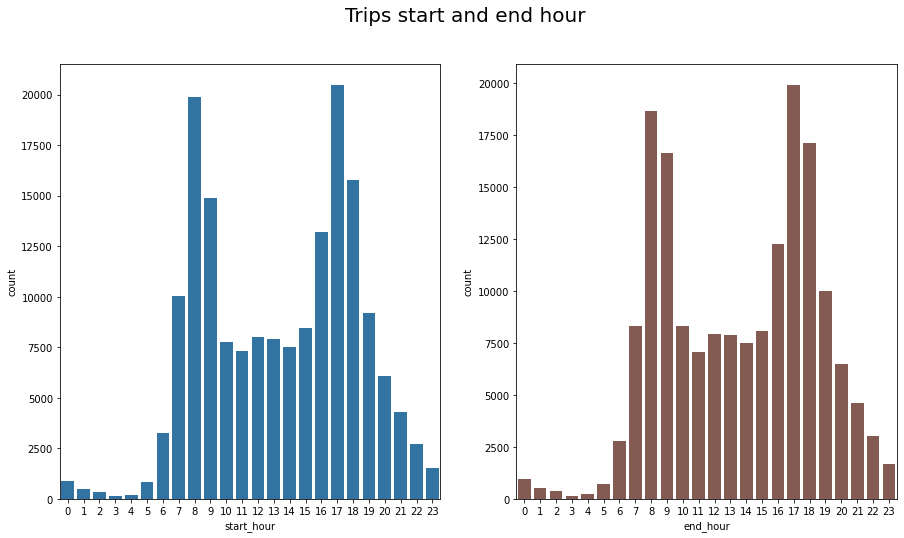

In [73]:
fig, ax = (plt.subplots(nrows=1,ncols=2,figsize=(15,8)))
fig.suptitle('Trips start and end hour',fontsize=20)

plot1 = sns.countplot(data=df_master, x='start_hour', color=base_color[0],ax=ax[0]);
plot2 = sns.countplot(data=df_master, x='end_hour', color=base_color[5],ax=ax[1]);

##### Observation:

* The peak hours are observed in the mornings starting from 7am to 9am and in the evenings from 4pm to 7pm


* Trips taken after 7pm decreases fairly till 12AM after which it then decreases drastically Until 5AM in the morning. 

#### Starting and Ending Day

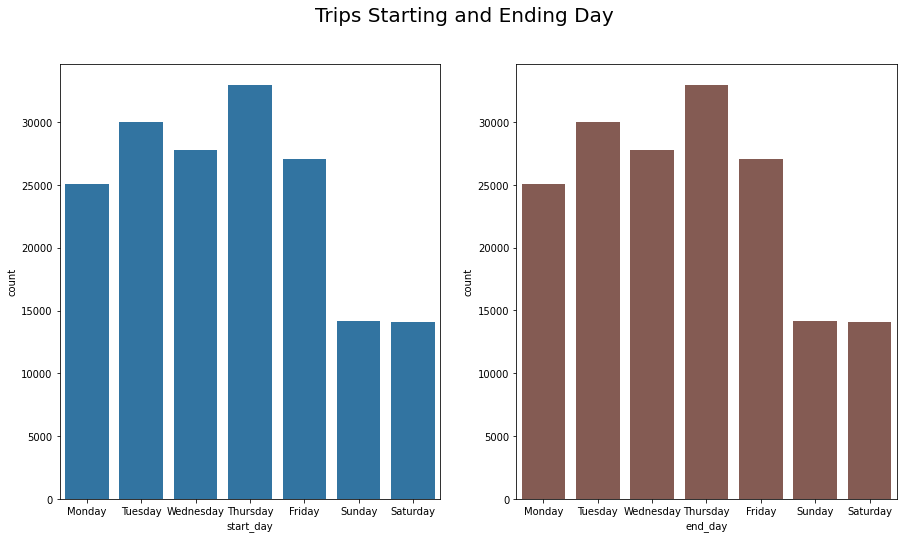

In [30]:
day_order= ['Monday','Tuesday','Wednesday','Thursday','Friday','Sunday','Saturday']

fig, ax = (plt.subplots(nrows=1,ncols=2,figsize=(15,8)))
fig.suptitle('Trips Starting and Ending Day',fontsize=20)

plot1 = sns.countplot(x='start_day', data=df_master,color=base_color[0],order=day_order,ax=ax[0]);
plot2 = sns.countplot(x='end_day', data=df_master,color=base_color[5],order=day_order,ax=ax[1]);

##### Observation:
* Majority of the trips are between Mondays and Fridays
* Satrudays and Sundays having a low number of trips
* Thursdays being the day with most trips and Mondays having the lowest amount of trips in the between Monday to Friday
* Thursdays has the most activities in the week


#### Trips Taken Daily in the month of February 

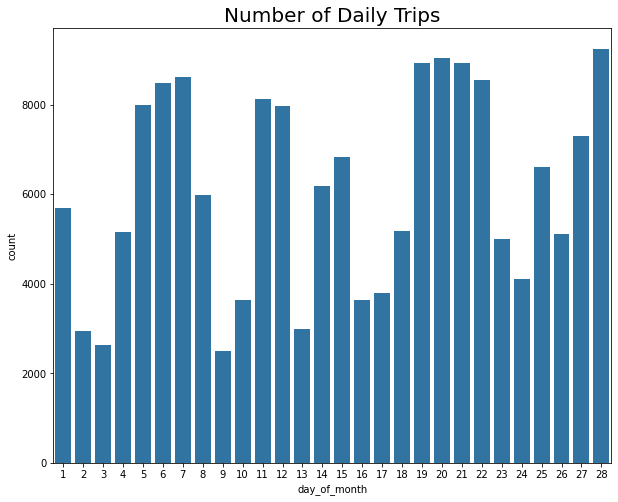

In [31]:
plt.figure(figsize=(10,8))
sns.countplot(x='day_of_month',data=df_master,color=base_color[0])
plt.title('Number of Daily Trips',fontsize=20)
plt.show;

#### Observation:
* Day 2 and 3, 9 and 10,16 and 17,23 and 24 being Saturday and Sunday respectively having a lower trip count  


* 13th of February being a Wednesday having an unusual low trip count 

* The last day of the month 28th, has the most number of trips

####  Weekly Trips in February 

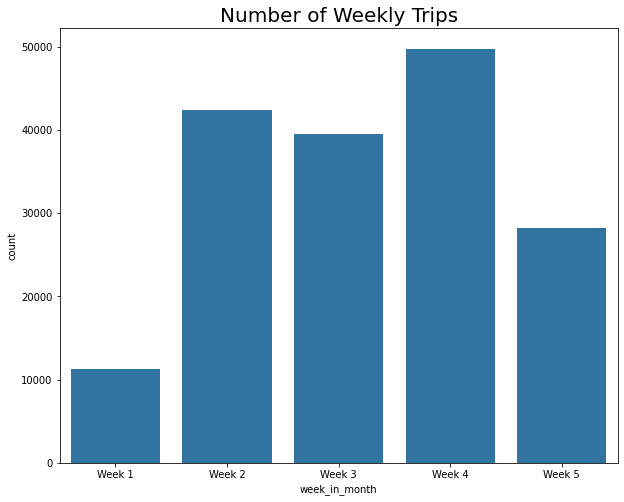

In [32]:
week_order=['Week 1','Week 2','Week 3','Week 4','Week 5',]

plt.figure(figsize=(10,8))
sns.countplot(data=df_master, x='week_in_month', color=base_color[0],order=week_order)
plt.title('Number of Weekly Trips',fontsize=20)
plt.show;

#### Observation:
* The First and fifth weeks having a low bike trip count


* Week 4 has the most amount of trips taken

### Stations Summary

* What are the most used stations?
* Are there stations with low trip counts?

#### Starting Station

In [33]:
s_station_count = df_master.start_station_name.value_counts()
s_station_count

Market St at 10th St                                         3576
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3368
Berry St at 4th St                                           2910
Montgomery St BART Station (Market St at 2nd St)             2641
Powell St BART Station (Market St at 4th St)                 2576
                                                             ... 
Farnam St at Fruitvale Ave                                      9
Parker Ave at McAllister St                                     6
21st Ave at International Blvd                                  4
Palm St at Willow St                                            3
16th St Depot                                                   2
Name: start_station_name, Length: 329, dtype: int64

In [34]:
top_5_sstation = s_station_count.head(5)
bottom_5_sstation = s_station_count.tail(5)

##### Ending Station

In [35]:
e_station_count = df_master.end_station_name.value_counts()
e_station_count

San Francisco Caltrain Station 2  (Townsend St at 4th St)    4581
Market St at 10th St                                         3636
Montgomery St BART Station (Market St at 2nd St)             3374
San Francisco Ferry Building (Harry Bridges Plaza)           3084
San Francisco Caltrain (Townsend St at 4th St)               2823
                                                             ... 
Parker Ave at McAllister St                                     8
Palm St at Willow St                                            7
16th St Depot                                                   6
Willow St at Vine St                                            5
21st Ave at International Blvd                                  5
Name: end_station_name, Length: 329, dtype: int64

#### Plots For Both Start and End Station

In [36]:
top_5_estation = e_station_count.head(5)
bottom_5_estation = e_station_count.tail(5)

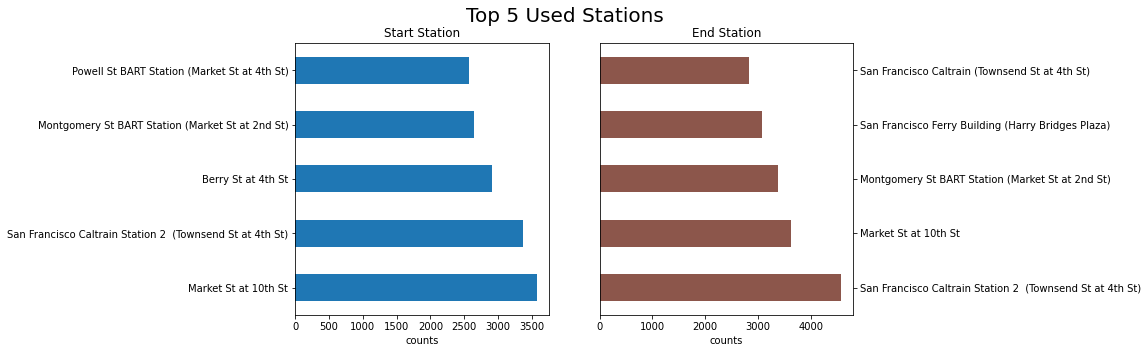

In [37]:
fig, ax = (plt.subplots(nrows=1,ncols=2,figsize=(10,5)))
fig.suptitle('Top 5 Used Stations',fontsize=20)

plot1 = top_5_sstation.plot(kind='barh',ax=ax[0],color=base_color[0])
plot1.set_xlabel('counts')
plot1.set_title('Start Station')

plot2 = top_5_estation.plot(kind='barh',ax=ax[1],color=base_color[5])
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()

plot2.set_xlabel('counts')
plot2.set_title('End Station')
plt.show;

#### Observations
    We have Market St, San Francisco Caltrain and Montgomery St BART Bike Stations apprearing in both start and end most used stations.
    
    

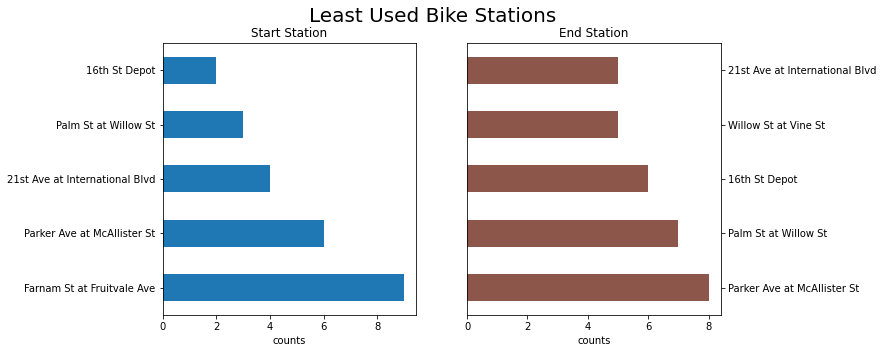

In [38]:
fig, ax = (plt.subplots(nrows=1,ncols=2,figsize=(10,5)))
fig.suptitle('Least Used Bike Stations',fontsize=20)

plot1 = bottom_5_sstation.plot(kind='barh',ax=ax[0],color=base_color[0])
plot1.set_xlabel('counts')
plot1.set_title('Start Station')

plot2 = bottom_5_estation.plot(kind='barh',ax=ax[1],color=base_color[5])
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
plot2.set_xlabel('counts')
plot2.set_title('End Station')
plt.show;

##### Observations
    Of all the 10 stations appearing in the chart, only 2 which are Willow St and Farnam St stations only made an appreance in one of the charts
    
    The other 8 stations have a low number of both starting and ending trips

### What User Type is Most Commom?

In [39]:
user_type_count = df_master.user_type.value_counts()
user_type_count

Subscriber    155119
Customer       16111
Name: user_type, dtype: int64

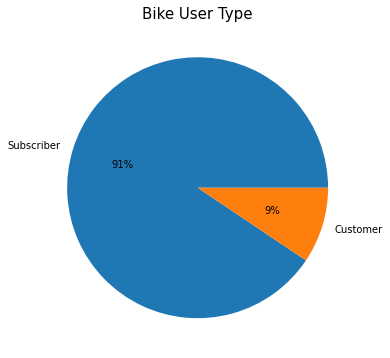

In [40]:
label= user_type_count.index  

plt.figure(figsize=(6,6))
plt.pie(x=user_type_count,labels=label,autopct='%.0f%%')
plt.title("Bike User Type",fontsize=15);

##### Observations
* Majority of the trips that took place in February were by Subscribers having 91% of the trips taken leaving the remaining 9% to Customers.
    

### What Are Member Gender Statistics?

In [41]:
member_gender_count = df_master.member_gender.value_counts()
member_gender_count

Male      130439
Female     40791
Name: member_gender, dtype: int64

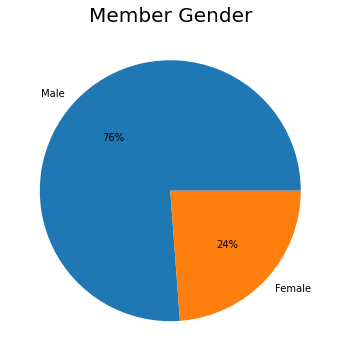

In [42]:
label= member_gender_count.index  

plt.figure(figsize=(8,6))
plt.pie(x=member_gender_count,labels=label,autopct='%.0f%%')
plt.title("Member Gender",fontsize=20);

##### Observations
* 76% of the trips were taken by the male gender while the remaining 24% was by Females.

### How Many Trips Made Use Of Bike Share?

In [43]:
bike_share = df_master.bike_share_for_all_trip.value_counts()
bike_share

No     154559
Yes     16671
Name: bike_share_for_all_trip, dtype: int64

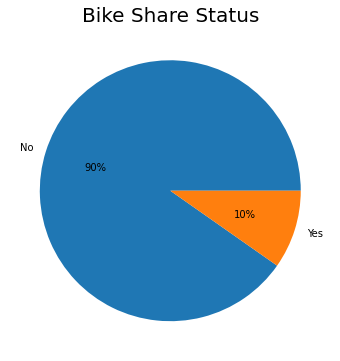

In [44]:
label= bike_share.index  

plt.figure(figsize=(8,6))
plt.pie(x=bike_share,labels=label,autopct='%.0f%%')
plt.title("Bike Share Status",fontsize=20);

##### Observations
* Only 10% of the trip population used bike share during their trips

### Trip Duration Analysis 

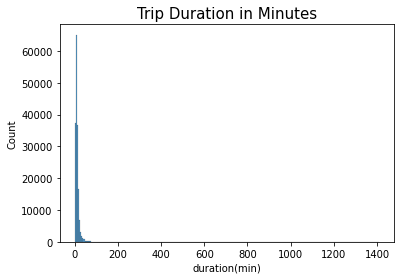

In [45]:
bins = np.arange(0, df_master['duration(min)'].max()+5, 5)
sns.histplot(x='duration(min)',data=df_master,bins=bins)
plt.title("Trip Duration in Minutes",fontsize=15);


##### Observation
    The distribution of duration is highly skewed to the right which shows a positively skewed distribution

#### Ploting duration on a log scale

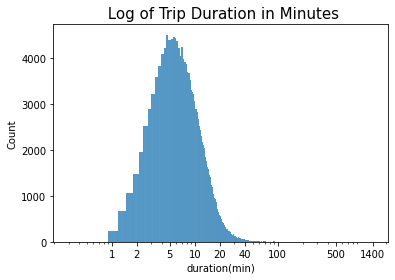

In [46]:
# ticks and label were manually set since the log scaling uses a different scale format

bins = np.arange(0, df_master['duration(min)'].max()+0.3, 0.3)


ticks = [1,2,5,10,20,40,100,500,1400]
labels = ['{}'.format(v) for v in ticks]

sns.histplot(x='duration(min)',data=df_master,bins=bins)
plt.title(" Log of Trip Duration in Minutes",fontsize=15)

plt.xscale("log")
plt.xticks(ticks, labels)
plt.show()

##### Observation
    The distribution is still positively skewed to the right since are still outliers at the right side.

#### Ploting duration on a log scale with 100 min limit

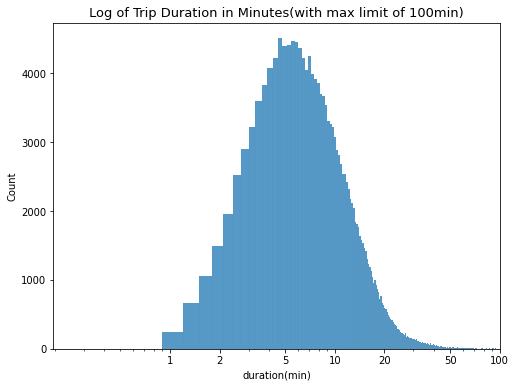

In [47]:
# This plot shows only durations less than 100 minutes
# ticks and label were manually set since the log scaling uses a different scale format

bins = np.arange(0, df_master['duration(min)'].max()+0.3, 0.3)

plt.figure(figsize=(8,6))
ticks = [1,2,5,10,20,50,100]
labels = ['{}'.format(v) for v in ticks]


sns.histplot(x='duration(min)',data=df_master,bins=bins)

plt.title(" Log of Trip Duration in Minutes(with max limit of 100min) ",fontsize=13)
plt.xscale("log")

plt.xticks(ticks, labels)
plt.xlim(right=100)
plt.show();

##### Observations
     After setting the upper limit on duration to 100min the distribution appears like a Normal distribution, However 95% of the trip duration falls between 0 and 25 minuites

### Member Age Analysis

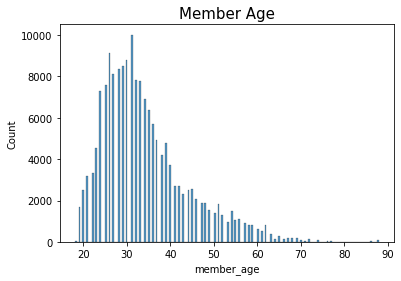

In [48]:
sns.histplot(x='member_age',data=df_master)
plt.title("Member Age",fontsize=15)
plt.show()

##### Observations
    The plot is pretty basic and bins would definitely be of help here

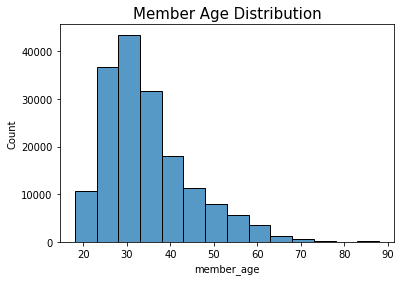

In [49]:

bins = np.arange(18, df_master['member_age'].max()+5, 5)

sns.histplot(x='member_age',data=df_master,bins=bins);
plt.title("Member Age Distribution",fontsize=15)
plt.show()

##### Observations
    A similar trend is observed on member age just as trip duration. A positively skewed distribution with approximately 85% of the ages falling on the left side of the graph(18 to 45)

### Analysis Of The Distance Between Stations

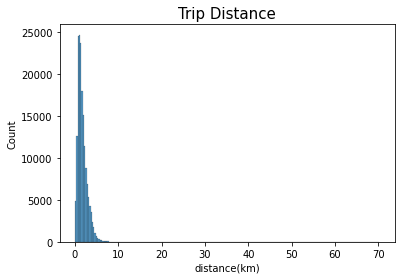

In [50]:
bins = np.arange(0, df_master['distance(km)'].max()+1, 0.3)
sns.histplot(x='distance(km)',data=df_master,bins=bins);
plt.title("Trip Distance",fontsize=15)
plt.show()

###### Observation
    There were only 8 trips that was more than 10 km which makes majority of the trip distance falling bellow 10km
    The distribution is a positively skewed distribution which can eith be plotted on a log scale or by limiting the x axis limit to 10

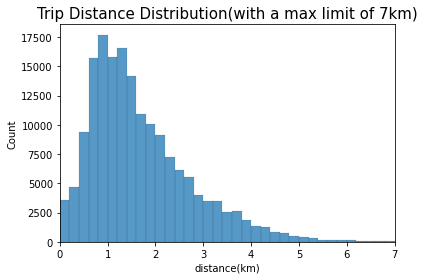

In [51]:
bins = np.arange(0, df_master['distance(km)'].max()+1, 0.2)
sns.histplot(x='distance(km)',data=df_master,bins=bins);
plt.xlim(right=7,left=0)
plt.title("Trip Distance Distribution(with a max limit of 7km)",fontsize=15)

plt.show()

##### Observations
    Majority of the trips distance covered by the bike users falls bellow 5km. With the average distance covered been 1.7km

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

* **Bike Trips Starting and Ending Hour** - The peak hours in the morning are observed between 7am and 9am indicating most trips are taken before office hours while the peak hours in the evening are between 4pm to 7pm which falls at the end of working hours. There are trips taken inbetween office hours but they appear to me fairly constant. The trips taken after business hours(7PM) decreases fairly till 12AM after which it then decreases drastically Until 5AM in the morning. 


* **Bike Trips Starting and Ending Day** -  With majority of the trips in a day taken between office hours, it isn't surprising that Mondays to Fridays would be the most active days leaving the weekends(Saturdays and Sundays) not as active with trips.  Thursdays being the day with most trips and Mondays having the lowest amount of trips in the working days(Monday to Friday)


* **Trips Taken Daily in the month of February** - The working days pattern still trends. With Friday being the first day in month of Febuary 2019, the following day, Satuday and Sunday having a lower trip count and then back to working days with higher trip. 13th of febuary which happens to be a Wednesday having a lower trip count suggests a public holiday, bad weather, or even an emercency of the bike services, but since it clearly affect the following days until the usual Sartudays and Sundays, the cause is not known yet.


* **Weekly Trips in February** - The First and fifth weeks having a low bike trip count is beacuse there were 2 days and 5 days present in week 1 and week 5 respectively. Moreover, Week 4 has the highest amount of trips taken.

   
* **User Type** - Majority of the trips that took place in February were by Subscribers.


* **Member Gender** - 76% of the trips were taken by the male gender while the remaining 24% was by Females.


* **Bike Share for all** - Only 10% of the trip population used bike share during their trips


* **Trip Duration** - The distribution of duration is highly skewed to the right which shows a positively skewed distribution. Then I plotted it on a log scale. It was still skewed to the right because there were few outliers dragging the chart to the  right. After setting the upper limit on duration to 100min the distribution appears like a Normal distribution, However 95% of the trip duration falls between 0 and 25 minuites



* **Member Age** - A similar trend is observed on member age just as trip duration. A positively skewed distribution with approximately 85% of the ages falling on the left side of the graph(18 to 45). With the help of bins the dustribution is shown clearly


* **Distance** - The distance distribution is highly skewed to the right which indicate a positively skewed distribution. Since most of the distance between stations were less than 10km, 7km was choosing to be the limit on the x axis on the plot. Majority of the trips distance covered by the bike users falls bellow 5km. With the average distance covered been 1.7km

### Other Variables
* **Stations Summary** 

> **Top 5 Station**
In both start and stop stations, we have Market St, San Francisco Caltrain and Montgomery St BART Bike Stations apprearing in both proving those stations had more trips both starting and ending there.

> **Bottom 5 Station**
Of all the 10 stations appearing in the bottom 5 used stations in both start nd end trips, only 2 which are Willow St and Farnam St stations only made an appreance in once. With the othwe four stations appearing in both bottom 5 stations, it indicates a low number of trips generally.


## Bivariate Exploration

In [52]:
df_master.head(1)

,duration(min),start_hour,end_hour,start_day,end_day,day_of_month,week_in_month,distance(km),bike_id,start_station_name,end_station_name,user_type,member_gender,bike_share_for_all_trip,member_age
0,869.75,17,8,Thursday,Friday,28,Week 5,0.544367,4902,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,Customer,Male,No,35.0


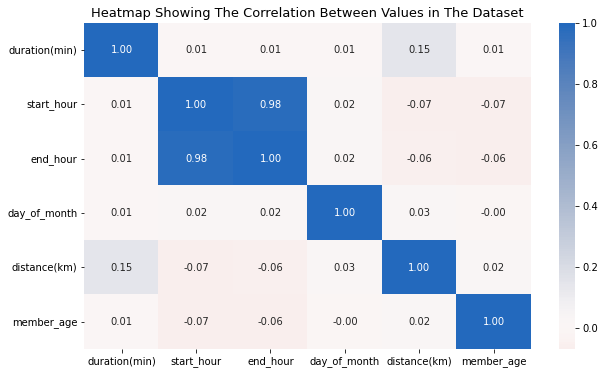

In [53]:
plt.figure(figsize=(10,6))
sns.heatmap(df_master.corr(),annot=True,cmap="vlag_r",center=0,fmt='.2f')
plt.title("Heatmap Showing The Correlation Between Values in The Dataset",fontsize=13)

plt.show()

##### Observations
* Only start and end hour have a strong positive correlation values, the rest have a very little correlation value. Its supricing to see that member age and trip duration have little too zero correlation
   


#### Checking the Relationship between Age and Duration

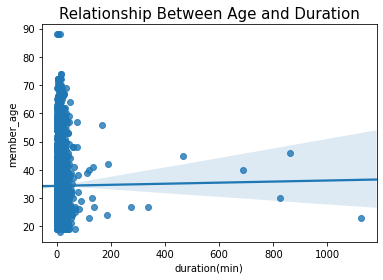

In [54]:

sns.regplot(data = df_master.sample(5000,random_state=1),truncate=False, x = 'duration(min)', y = 'member_age')
plt.title("Relationship Between Age and Duration",fontsize=15)
plt.show()


##### Observations
* The plots confirms theres little corelation between the two values

### User Types

####  How Does User Type affect  hourly trips?

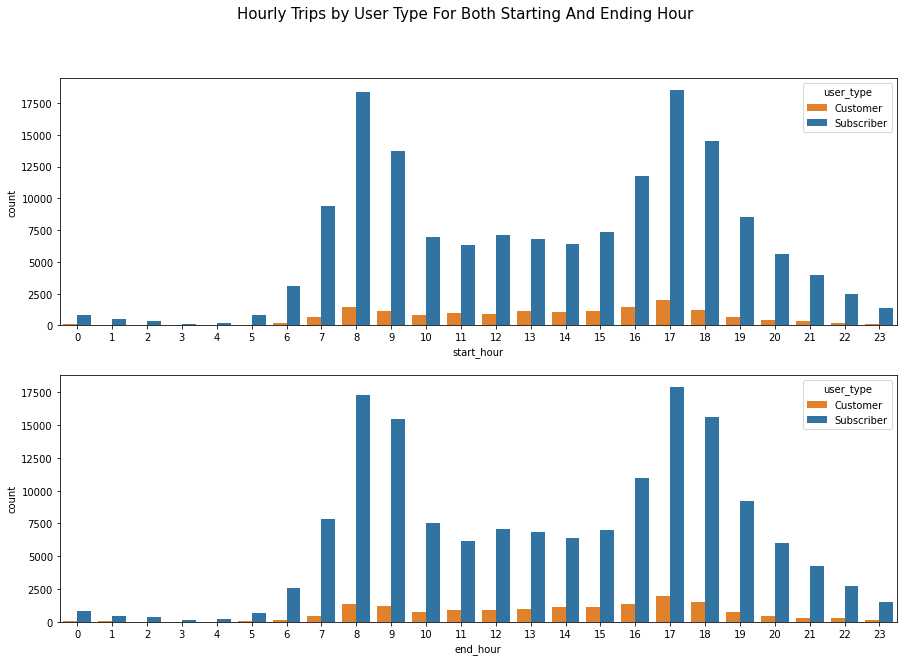

In [55]:
fig, ax = (plt.subplots(2,figsize=(15,10)))
fig.suptitle('Hourly Trips by User Type For Both Starting And Ending Hour',fontsize=15)           
plot1 = sns.countplot(x='start_hour',hue='user_type',palette=["#ff7f0e",'#1f77b4'],data=df_master,ax=ax[0])
plot2= sns.countplot(x='end_hour',hue='user_type',palette=["#ff7f0e",'#1f77b4'],data=df_master,ax=ax[1])


##### Observations
Generally, Subscribers have a higher number of trips per hour.
    
* **Start hour**
    8am and 5pm is the peak hour for both customers and subscribers
    
* **End hour**
    8am and 5pm is the peak hour for Subscribers  while 5pm and 6pm is the peak hour for Customers.
    

#### How Does User Types affect  Daily Trips?

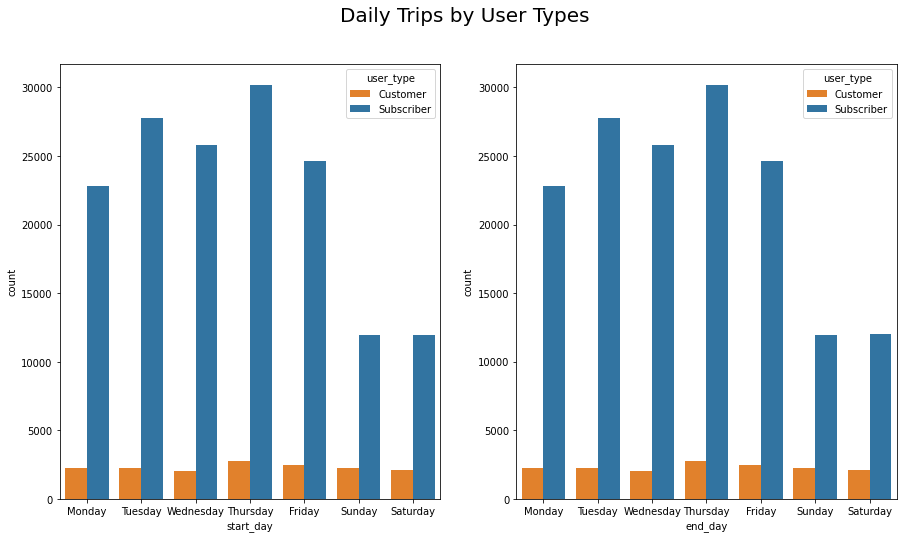

In [56]:
day_order= ['Monday','Tuesday','Wednesday','Thursday','Friday','Sunday','Saturday']

fig, ax = (plt.subplots(nrows=1,ncols=2,figsize=(15,8)))
fig.suptitle('Daily Trips by User Types',fontsize=20)

plot1 = sns.countplot(x='start_day',hue='user_type', data=df_master,palette=["#ff7f0e",'#1f77b4'],order=day_order,ax=ax[0]);
plot2 = sns.countplot(x='end_day',hue='user_type', data=df_master,palette=["#ff7f0e",'#1f77b4'],order=day_order,ax=ax[1]);

#### Observations
Generally, Subscribers have a higher number of trips per day. Trips on weekdays(Mon- Fri) have a higher number of trips compared to the weekends(Sat-Sun)

* Thursday has the most number of trips of all day for both Customers and Subscribers

*  Customers trip appears constant all day with little variation
  
    

#### How Does User Types affect  Daily Trips in a Month?

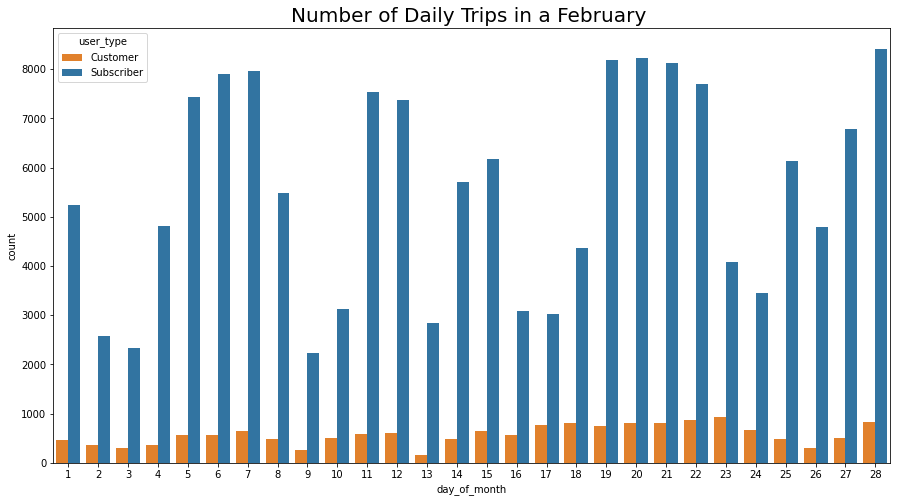

In [57]:
plt.figure(figsize=(15,8))
sns.countplot(x='day_of_month',hue='user_type',data=df_master,palette=["#ff7f0e",'#1f77b4'])
plt.title('Number of Daily Trips in a February ',fontsize=20)
plt.show;

##### Observations
* 13th and 23rd of Febuary happens to be the day of the lowest and highest number of trips respictively for Customers, while
    
* 9th and 28th of Febuary is the day of the lowest and highest number of trips respictively for Subscribers

#### How Does User Types Affects Weekly Trips?

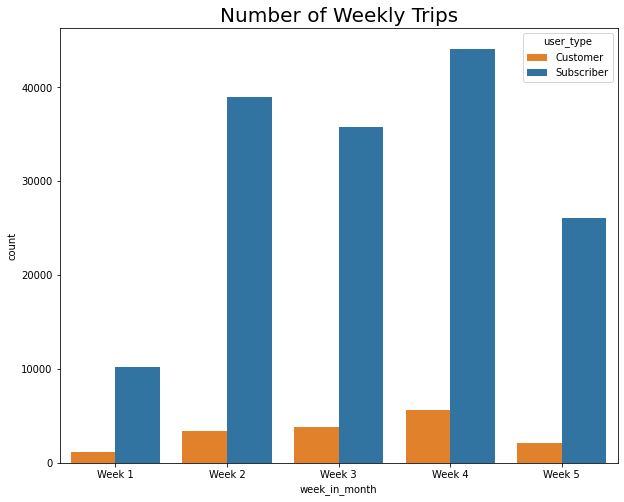

In [58]:
week_order=['Week 1','Week 2','Week 3','Week 4','Week 5',]

plt.figure(figsize=(10,8))
sns.countplot(data=df_master, x='week_in_month',hue='user_type',palette=["#ff7f0e",'#1f77b4'],order=week_order)
plt.title('Number of Weekly Trips',fontsize=20)
plt.show;

#### Observations
* Customers and Subscribers both took a hit on number of trips in both week 1 and 5 since the numbers of days wasn't up to 7 

# Members Age

What intresting observation can come out of   Member  Age against

####  Start and End hours 

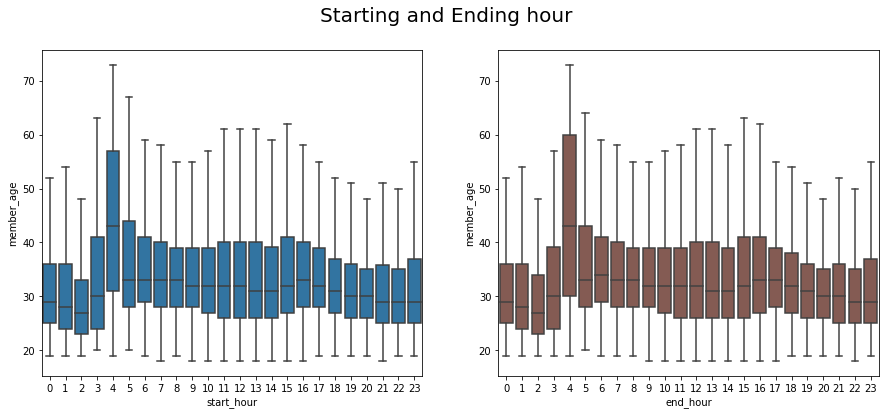

In [59]:
# showfliers = False - helps to filter out outliers

fig, ax = (plt.subplots(nrows=1,ncols=2,figsize=(15,6)))
fig.suptitle('Starting and Ending hour',fontsize=20)

plot1 = sns.boxplot(x="start_hour",y='member_age',data=df_master,color=base_color[0],ax=ax[0],showfliers=False)
plot2 = sns.boxplot(x="end_hour",y='member_age',data=df_master,color=base_color[5],ax=ax[1],showfliers=False)

#### Observations
* On average, trips that starts from 4am to 6pm are of older age

* Trips from 7 pm to 3pm on average are mostly by people of lower age

* Trips at 4am are on average by older persons

##### Start_day and End day

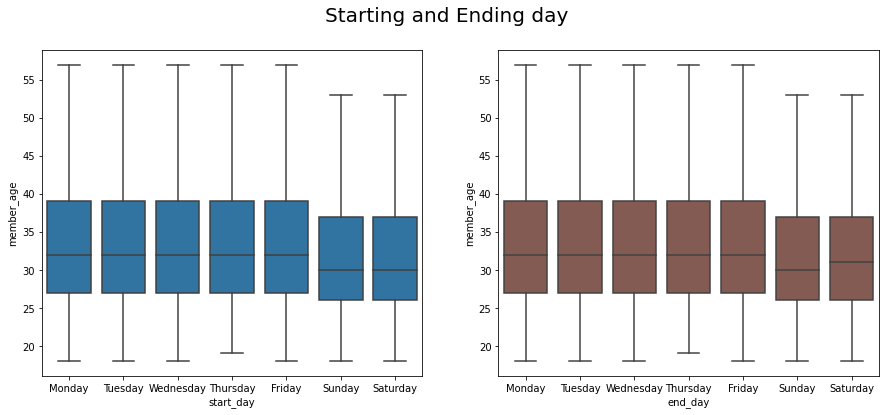

In [60]:
# showfliers helps filtering out outliers

fig, ax = (plt.subplots(nrows=1,ncols=2,figsize=(15,6)))
fig.suptitle('Starting and Ending day',fontsize=20)


plot1 = sns.boxplot(x="start_day",y='member_age',data=df_master,order=day_order,color=base_color[0],ax=ax[0],showfliers=False)
plot2 = sns.boxplot(x="end_day",y='member_age',data=df_master,order=day_order,color=base_color[5],ax=ax[1],showfliers=False)


##### Observations
*  On average, the age of biker on Mondays to Fridays are older than that of the weekends
  
* It seems the average age of bikers on weekdays is the same 
  
* On average, bikers on Sunday have a lower age

#### Week and months

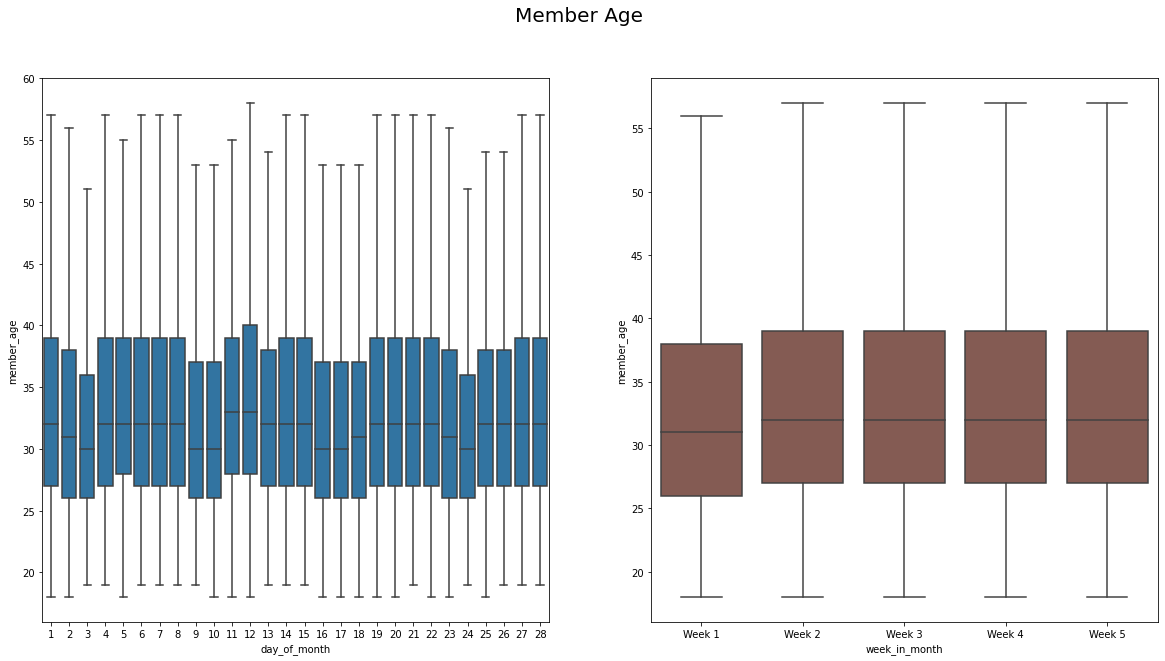

In [61]:
# Outliers removed

fig, ax = (plt.subplots(nrows=1,ncols=2,figsize=(20,10)))
fig.suptitle('Member Age ',fontsize=20)

plot1 = sns.boxplot(x="day_of_month",y='member_age',data=df_master,color=base_color[0],ax=ax[0],showfliers=False)
plot2 = sns.boxplot(x="week_in_month",y='member_age',data=df_master,order=week_order,color=base_color[5],ax=ax[1],showfliers=False)


### Observations
**Days in the Month**
* On average, rides on Sunday tends to be of lower age
* On average, riders weekdays(Mon-Fri) are older than that of weekends(Sat-Sun) riders

**Weeks in Month**
* Average weekly age appears to be constant except for on week one


#### Member Information

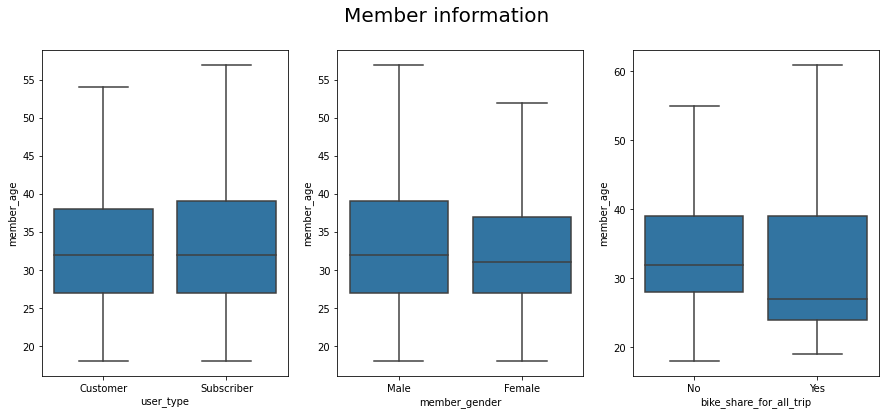

In [62]:
# Outliers removed
fig, ax = (plt.subplots(nrows=1,ncols=3,figsize=(15,6)))
fig.suptitle('Member information',fontsize=20)

plot1 = sns.boxplot(x="user_type",y='member_age',data=df_master,color=base_color[0],ax=ax[0],showfliers=False)
plot2 = sns.boxplot(x="member_gender",y='member_age',data=df_master,color=base_color[0],ax=ax[1],showfliers=False)
plot3 = sns.boxplot(x="bike_share_for_all_trip",y='member_age',data=df_master,color=base_color[0],ax=ax[2],showfliers=False)

### Observations
*  Average age of Customers and Subscriber is approximatly the same.

* The average Male riders is older than that of average Female rider

* Average age of those who did not use bike share for all trip is more that those who did use bike share.

# Duration

How does Trip Duration interacts with trip information?

##### Starting and Ending Hour

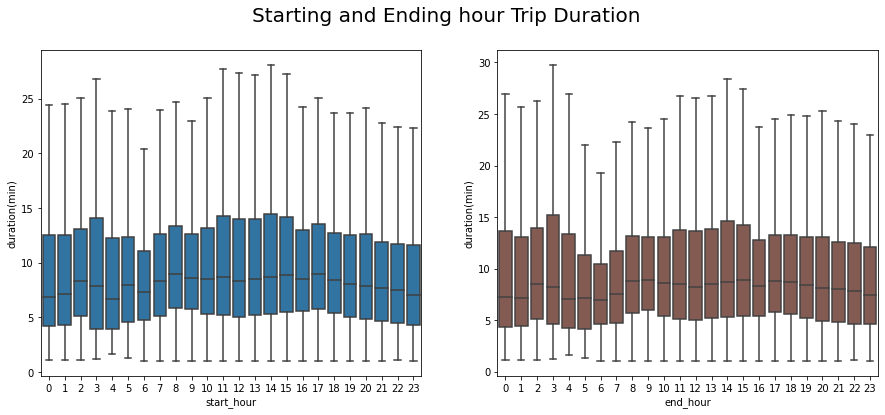

In [63]:

fig, ax = (plt.subplots(nrows=1,ncols=2,figsize=(15,6)))
fig.suptitle('Starting and Ending hour Trip Duration',fontsize=20)

plot1 = sns.boxplot(x="start_hour",y='duration(min)',data=df_master,color=base_color[0],ax=ax[0],showfliers=False)
plot2 = sns.boxplot(x="end_hour",y='duration(min)',data=df_master,color=base_color[5],ax=ax[1],showfliers=False)



### Observations
* Trips between 8am and 6pm on average have a longer duration compared to other hours


##### Starting and Ending Day

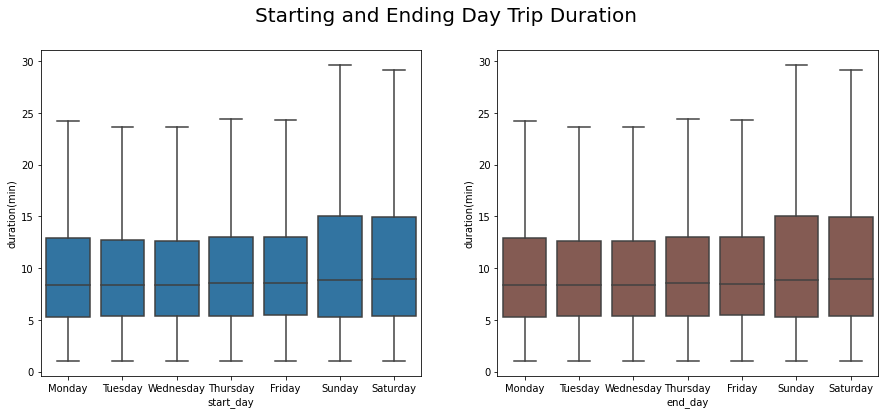

In [64]:
#
fig, ax = (plt.subplots(nrows=1,ncols=2,figsize=(15,6)))
fig.suptitle('Starting and Ending Day Trip Duration',fontsize=20)


plot1 = sns.boxplot(x="start_day",y='duration(min)',data=df_master,order=day_order,color=base_color[0],ax=ax[0],showfliers=False)
plot2 = sns.boxplot(x="end_day",y='duration(min)',data=df_master,order=day_order,color=base_color[5],ax=ax[1],showfliers=False)


##### Observations
* On average, Trips during the weekends(Sat-Sun) have a longer duration

* On average, Trips during the weekdays(Mon-Fri) have the same duration


#### Week and months

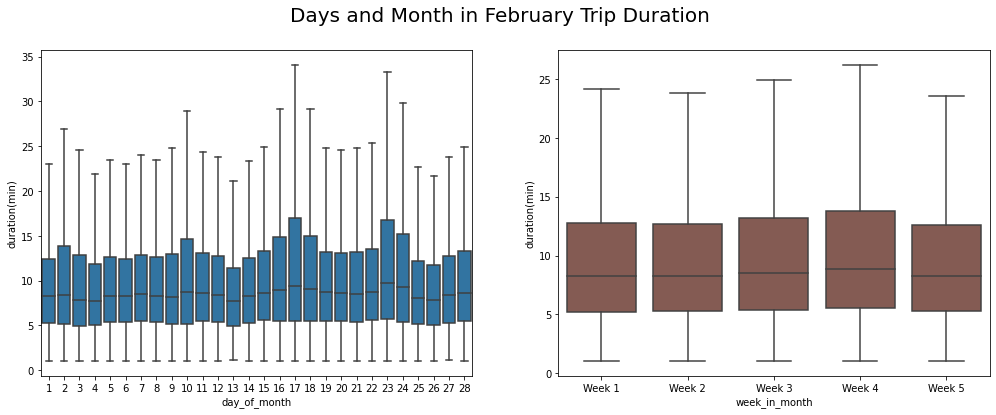

In [65]:
# 
fig, ax = (plt.subplots(nrows=1,ncols=2,figsize=(17,6)))
fig.suptitle('Days and Month in February Trip Duration',fontsize=20)

plot1 = sns.boxplot(x="day_of_month",y='duration(min)',data=df_master,color=base_color[0],ax=ax[0],showfliers=False)
plot2 = sns.boxplot(x="week_in_month",y='duration(min)',data=df_master,order=week_order,color=base_color[5],ax=ax[1],showfliers=False)


### Observations
* Day 13 has the lowest average trip duration
 
* Day 23 has the highest average trip duration

* Week 4 has the highest average trip duration in the monrh of febuary

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

* Generally, Subscribers have a higher number of trips per hour. With 8am and 5pm having more of both customer and subscribers.

* On average, Trips on weekdays(Mon- Fri) have a higher number of trips compared to the weekends(Sat-Sun). With Thursday havig the most number of trips. Customers dont follow the trend of weekdays been the most active and weekends not as active but rather Customers trip remains fairly constant all day

* For the usertypes of the daily trips in a month,  13th and 23rd of Febuary happens to be the day of the lowest and highest number of trips respictively for Customers, while 9th and 28th of Febuary is the day of the lowest and highest number of trips respictively for Subscribers

* As for the weekly trips, Customers and Subscribers both took a hit on number of trips in both week 1 and 5 since the numbers of days wasn't up to 7 

* On average, trips that starts from 4am to 6pm are of older age. Trips from 7 pm to 3pm on average are mostly by people of lower age. Trips at 4am are on average by older persons

* On average, the age of biker on Mondays to Fridays are older than that of the weekends. It seems the average age of bikers on weekdays is the same. On average, bikers on Sunday have a lower age

* On average, rides on Sunday tends to be of lower age. On average, riders weekdays(Mon-Fri) are older than that of weekends(Sat-Sun) riders

* Average weekly age appears to be constant except for on week one


* The Average age of Customers and Subscriber is approximatly the same. On average Male riders is older than that of average Female rider. Also Average age of those who did not use bike share for all trip is more that those who did use bike share for all trip.

* Trips between 8am and 6pm on average have a longer duration compared to other hours

* On average, Trips during the weekends(Sat-Sun) have a longer duration. On average, Trips during the weekdays(Mon-Fri) have the same duration

* Day 13 has the lowest average trip duration. Day 23 has the highest average trip duration. Week 4 has the highest average trip duration in the monrh of febuary

## Multivariate Exploration

In [66]:
df_master.head(1)

,duration(min),start_hour,end_hour,start_day,end_day,day_of_month,week_in_month,distance(km),bike_id,start_station_name,end_station_name,user_type,member_gender,bike_share_for_all_trip,member_age
0,869.75,17,8,Thursday,Friday,28,Week 5,0.544367,4902,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,Customer,Male,No,35.0


### Who Spends More Time Biking And At What Hour And What Day?

##### Starting and Ending Hour

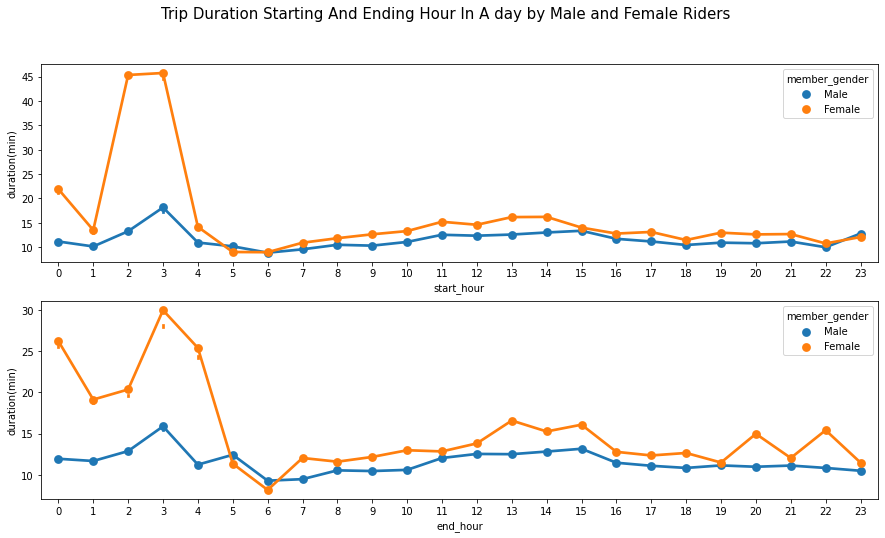

In [67]:
fig, ax = (plt.subplots(nrows=2,ncols=1,figsize=(15,8)))
fig.suptitle('Trip Duration Starting And Ending Hour In A day by Male and Female Riders',fontsize=15)
plot1 = sns.pointplot(x='start_hour',y='duration(min)', ci =True,
    hue='member_gender',data=df_master, ax=ax[0])


plot2 = sns.pointplot(x='end_hour',y='duration(min)',ci =True,
    hue='member_gender', data=df_master, ax=ax[1])


##### Observations
Generally, Female riders spends more time than their male counterparts, However,

**Start Hour**
* At 5am and 11pm the duration of male riders is higher that that of female riders 

**End Hour**
* At 5am to 6am the duration of male riders is higher that that of female riders 

##### Starting and Ending Day

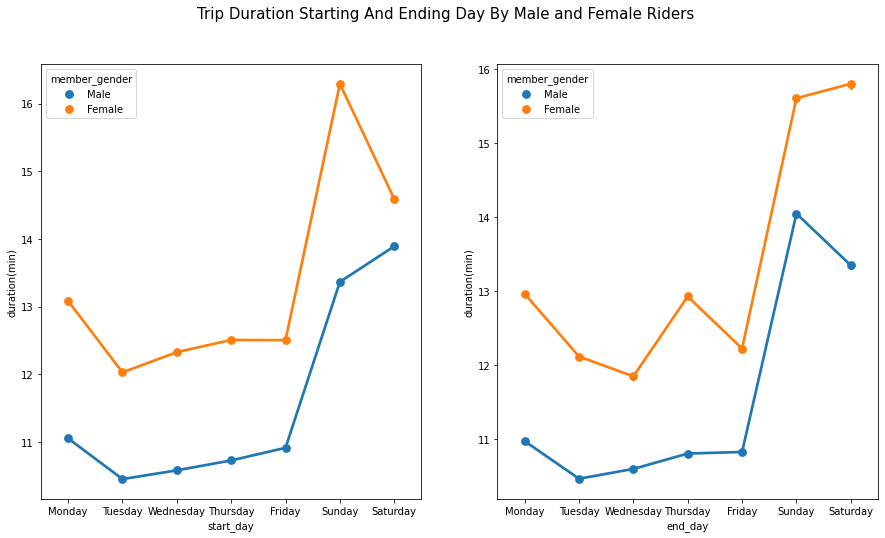

In [74]:

fig, ax = (plt.subplots(nrows=1,ncols=2,figsize=(15,8)))
fig.suptitle('Trip Duration Starting And Ending Day By Male and Female Riders',fontsize=15)

plot1 = sns.pointplot(x="start_day",y='duration(min)',hue='member_gender', ci =True,
    data=df_master,palette=[base_color[0],base_color[1]],ax=ax[0],linestyles = '-',order=day_order)

plot2 = sns.pointplot(x="end_day",y='duration(min)',data=df_master,hue='member_gender',ci=True,
                     color=base_color[5],ax=ax[1],palette=[base_color[0],base_color[1]],linestyles = '-', order=day_order)


##### Observations
* Weekend(Sat-Sun) Trips have a longer duration compared to other days of the weeks

* Intrestingly, The hours where male riders spends more time than their female counterpart's isn't significant enough to show in the daily trips in a week.

### How Do Week Day Riders Different From Weekends Riders

* Since weekends riders appears to spend more time riding compared to those that ride on weekdays, it would be intresting to see how they differ or even if they have a similar characteristics.

##### Starting Hour

In [69]:
# Spliting the dataset into Weekdays and weekends
weekday = df_master[~((df_master.start_day == 'Sunday') | (df_master.end_day == 'Saturday'))]

weekend = df_master[((df_master.start_day == 'Sunday') |  (df_master.end_day == 'Saturday'))]


weekend = weekend[~(weekend.start_day == 'Friday')]
weekday = weekday[~(weekday.start_day == 'Saturday')]



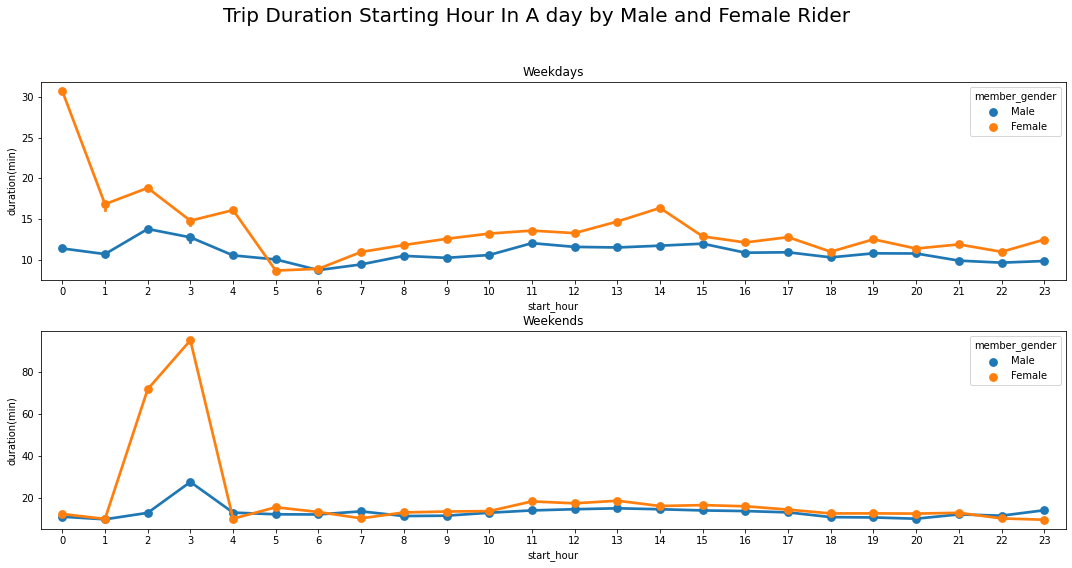

In [70]:
# tight_layout helps avoids plot 2 tittle and plot 1 x-label overlapping
# subplots_adjust to avoid suptitle overlapping with tittle

fig, ax = (plt.subplots(nrows=2,ncols=1,figsize=(15,8)))
fig.suptitle('Trip Duration Starting Hour In A day by Male and Female Rider',fontsize=20)
plot1 = sns.pointplot(x='start_hour',y='duration(min)', ci =True,
    hue='member_gender',data=weekday, ax=ax[0])
plot1.set_title("Weekdays")


plot2 = sns.pointplot(x='start_hour',y='duration(min)', ci =True,
    hue='member_gender', data=weekend, ax=ax[1])
plot2.set_title("Weekends")

plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show;

### Observations 
*  The average trip duration for weekends goes as high as 80 minutes while to 30 minutes for weekdays
* The peak duration during weekdays occurs at 12am for female riders while its 2am for male riders
* The peak duration during weekends occurs at 3am for both male and female riders
* Interestingly, Duration of trips between 4am to 11pm during weekends appears constant


##### Ending Hour

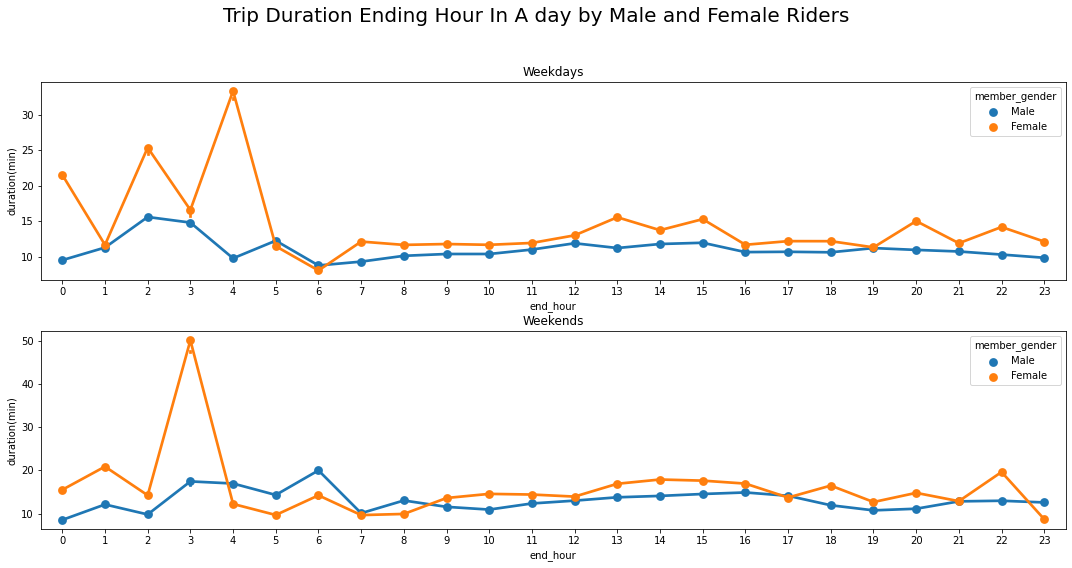

In [71]:
fig, ax = (plt.subplots(nrows=2,ncols=1,figsize=(15,8)))
fig.suptitle('Trip Duration Ending Hour In A day by Male and Female Riders',fontsize=20)
plot1 = sns.pointplot(x='end_hour',y='duration(min)', ci =True,hue='member_gender',data=weekday, ax=ax[0])
plot1.set_title("Weekdays")

plot2 = sns.pointplot(x='end_hour',y='duration(min)', ci =True,hue='member_gender', data=weekend, ax=ax[1])
plot2.set_title("Weekends")

plt.tight_layout()
plt.subplots_adjust(top=0.85)

plt.show;

##### Observations
* The average trip duration for weekends goes as high as 50 minutes while to 30 minutes for weekdays
* The peak duration during weekdays occurs at 4am for female riders while its 2am for male riders
* The peak duration during weekends occurs at 3am while its 6am during weekends for male riders

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?


Generally, Female riders spends more time than their male counterparts, However,

**Start Hour**
* At 5am and 11pm the duration of male riders is higher that that of female riders 

**End Hour**
* At 5am to 6am the duration of male riders is higher that that of female riders 


Weekend(Sat-Sun) Trips have a longer duration compared to other days of the weeks. Intrestingly, The hours where male riders spends more time than their female counterpart's isn't significant enough to show in the daily trips in a week.

****
After splitting the dataset based on the observation that Trips on Saturdays and Sundays tends to have a longer trips, the following was observed,

**Start Hour**

*  The average trip duration for weekends goes as high as 80 minutes while to 30 minutes for weekdays
* The peak duration during weekdays occurs at 12am for female riders while its 2am for male riders
* The peak duration during weekends occurs at 3am for both male and female riders
* Interestingly, Duration of trips between 4am to 11pm during weekends appears constant

**End Hour**
* The average trip duration for weekends goes as high as 50 minutes while to 30 minutes for weekdays
* The peak duration during weekdays occurs at 4am for female riders while its 2am for male riders
* The peak duration during weekends occurs at 3am while its 6am during weekends for male riders

## Conclusions
A lot of cleaning was done on the data, with lots of variables derived from the original dataset. And after diligent analysis has been done, I can conclude that,

* Female riders spends on average a longer time compared to male riders. Although there were hours male riders were more than the female riders. It proved insignificant in the overall trips that happens in a week

* An average trip on weekends take more since most of the trips that happens on weekdays are the trips in working hours, in between working hoursand immediately after working hours.

In [72]:
# Storing the data final form
df_master.to_csv('df_master.csv',index=False)

### Reference
* [Distance Calculation Function](https://stackoverflow.com/a/29546836)